<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Multivariate Analysis

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Multivariate Analysis**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Data Preparation](https://youtu.be/H73dwxNTdYU?si=8H1clq7mUcY7VLoL)
* [Multivariate Analysis](https://youtu.be/Ui2El5CZPRE?si=uA_IqurENzC6Owbg)
* [Feature Selection](https://youtu.be/5Q0gemu-h3Q?si=BpYhdxNVYOOYt74q)
* [Feature Transformations](https://youtu.be/6QJjZoWknEI?si=Bab3VTlMbO1xCPRh)
* [Shapley Values](https://youtu.be/oCIybnawLdg?si=E_ywWmDFq6T9TeV7)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Multivariate Analysis

To build good machine learning models, we build on a foundation of statistical analysis to explore and understand the relationships within our data. This includes the relationships between 2 or more features at a time!

* in many cases these multivariate statistics are actually critical components of the machine learning methods, e.g., eigenvalues and eigenvectors are calculated from the covariance matrix for principal component analysis.

Let's talk about bivariate and multivariate methods briefly. I confess the statistics beyond bivariate is a placeholder right now. Note, in the feature ranking workflow (link above) I have included partial correlation, maximum relevance minimum redundancy (MRMR) based on mutual information and random forest feature importance methods that extract information beyond bivariate. 

#### Bivariate Analysis

Understand and quantify the relationship between two variables, i.e., the bivariate probability density function, $f_{x,y}(x,y)$, for example,

* porosity and permeability

* fraction of shale and oil recovery

* copper and gold

* basal area and tree height
  
How can we use these relationships? To improve our prediction models and ultimately make better decisions.

What would be the impact if we ignore these relationships and simply modeled each feature separately?

* **assumption of independence** - there will be no relationship between our estimates or simulated realizations, the joint probability density function will not be reproduced and unrealistic combinations may occur, e.g., very high permeability with very low porosity 

* **data conditioning** - will impose the relationship at data locations. The geostatistics models honor the data at the data locations and the data scatter plot is the correct relationship, but away from the data this relationship will fade

Here's an example of an interesting bivariate relationship. When we scatter plot the data and plot the facies we can see the natural groups with respect to porosity and permeability. Clearly, considering only porosity or permeability would not be sufficient to understand this data.

<figure style="text-align: center;">
  <img src="_static/multivariate/bivariate_example.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Example of a complicated bivariate relationship.</figcaption>
</figure>

Bivariate statistics are our tools to quantify and impose these bivariate relationships in our geostatistical models.

#### Bivariate Statistics

**Pearson’s Product‐Moment Correlation Coefficient** or just the correlation coefficient or just correlation, is a widely-known bivariate statistic, if you say 0.9 correlation most engineers and scientists can visualize this! Here's the important points and limitations for the correlation coefficient,

* the notation for correlation is, $\rho_{x,y}$

* provides a measure of the degree of linear relationship, i.e., nonlinear relationships will bias the correlation coefficient

* is very sensitive to outliers, i.e., a single extreme outlier can significantly increase or reduce the apparent correlation

There are some other deeper points that should be made about the Gaussian assumption,

* the correlation coefficient provides a complete description for the bivariate relationship only under the assumption of bivariate Gaussianity. If we assume Gaussian, then the means, $\overline{x}$ and $\overline{y}$, standard deviations, $s_x$ and $s_y$, with the correlation coefficient, $\rho_{x,y}$ completely describe the bivariate probability density function $f_{x,y}(x,y)$

* for any other distributions, the correlation coefficient is not sufficient to know the entire, bivariate probability density function $f_{x,y}(x,y)$, e.g., to calculate conditional distributions, $f_{x|y}$

* the standard approach in geostatistics is to apply Gaussian anamorphosis to each feature and then to assume bivariate Gaussian so that the correlation coefficient is sufficient to describe the relationship between the two features

What about spatial bivariate relationship?

* the full cokriging system includes cross variograms and cross covariance that capture the relationships between two features over space! But due to the difficulty of inferring and modeling the required linear model of coregionalization, this is rarely done.

* instead a simplifying apply like collocated cokriging is applied that only retains the collocated secondary data and limits the model of bivariate relationship to the collocated (lag $\bf{h}$ of 0.0) correlation coefficient

More could be done! Let's review the sample variance of variable $x$. Of course, I'm truncating our notation as $x$ is a set of samples a locations in our modeling space, $x(\bf{u_\alpha}), \, \forall \, \alpha = 0, 1, \dots, n - 1$.

$$
\sigma^2_{x}  = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{(n-1)}
$$

We can expand the squared term and replace on of them with $y$, another variable in addition to $x$.

$$
C_{xy}  = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{(n-1)}
$$

We now have a measure that represents the manner in which variables $x$ and $y$ co-vary or vary together.  We can standardized the covariance by the product of the standard deviations of $x$ and $y$ to calculate the correlation coefficient. 

$$
\rho_{xy}  = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{(n-1)\sigma_x \sigma_y}, \, -1.0 \le \rho_{xy} \le 1.0
$$

In summary we can state that the correlation coefficient is related to the covariance as:

$$
\rho_{xy}  = \frac{C_{xy}}{\sigma_x \sigma_y}
$$

To help you calibrate you eye to the correlation coefficient I developed an interactive [correlation dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Correlation_Coefficient.ipynb). 

* for the bivariate Gaussian case vary the correlation coefficient and observe the samples, condition expectation and joint probability density

<figure style="text-align: center;">
  <img src="_static/multivariate/correlation.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Interactive Python dashboard for visualizing correlation coefficient.</figcaption>
</figure>

The Person's correlation coefficient is quite sensitive to outliers and departure from linear behavior (in the bivariate sense). 

For an more robust correlation measure in the presence of outliers and nonlinearity, we have an alternative known as the Spearman's rank correlations coefficient.   

$$
\rho_{R_x R_y}  = \frac{\sum_{i=1}^{n} (R_{x_i} - \overline{R_x})(R_{y_i} - \overline{R_y})}{(n-1)\sigma_{R_x} \sigma_{R_y}}, \, -1.0 \le \rho_{R_x,R_y} \le 1.0
$$

The rank correlation applies the rank transform to the data prior to calculating the correlation coefficient.  To calculate the rank transform simply replace the data values with the rank $R_x = 1,\dots,n$, where $n$ is the maximum value and $1$ is the minimum value. 

$$
x_\alpha, \, \forall \alpha = 1,\dots, n, \, | \, x_i \ge x_j \, \forall \, i \gt j 
$$

$$
R_{x_i} = i
$$

To compare Pearson and rank correlation in the presence of an outlier I developed this [correlation outlier dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Correlation_Coefficient_Issues.ipynb),

<figure style="text-align: center;">
  <img src="_static/multivariate/correlation_outlier.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Interactive Python dashboard for visualizing correlation coefficient.</figcaption>
</figure>

The correlation coefficients provide useful metrics to quantify relationships between two variables at a time. We can also consider bivariate scatter plots and matrix scatter plots to visualize multivariate data. 

* remember, current practical subsurface modeling is bivariate, two variables at a time    


#### Multivariate Statistics

While we are limited to bivariate models, we need to understand some multivariate methods to work with multivariate data. 

* only a short summary is provided here, see the discussion on joint and conditional probabilities and distributions in the [Probability Concepts](GeostatsPy_probability) chapter

* see my lecture on [Multivariate Analysis](https://youtu.be/Ui2El5CZPRE?si=uA_IqurENzC6Owbg)

Here's a short summary of multivariate statistics. If we define a probability density function (PDF) of feature $X_1$ as,

$$
f_{X_1}(x_1)
$$

we can extend the definition to a joint PDF for any arbitrary number, e.g., $m$, features as,

$$
f_{X_1,\ldots,X_m}(x_1,\ldots,x_m)
$$

Similarly, conditional PFDs can be calculated,

$$ 
f_{Y | X}(y | x)
$$

and extended to any number of features, e.g., $m$, features as,

$$ 
f_{Y | X_1, \ldots, X_m}(y | x_1,\ldots,x_m)
$$

and many of our statistical concepts extend to high dimensions, for example consider the correlation coefficient,

$$
\rho_{X,Y}
$$ 

between 2 features and now the partial correlation coefficient that calculates correlation between 2 features ($X$ and $Y$) while controlling for all other features ($Z$).

$$
\rho_{X,Y | Z}
$$ 

Ultimately the difficulty with calculating high dimensionality (massively multivariate) probabilities and statistics is inferential, we rarely have enough data to observe vast multivariate space and to model probabilities and statistics in that space! 

* See my linked lecture on the curse of dimensionality above.


#### Load the Required Libraries

The following code loads the required libraries.

In [2]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python  
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))     

GeostatsPy version: 0.0.72


We will also need some standard packages. These should have been installed with Anaconda 3.

In [19]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
from scipy import stats                                       # summary statistics
from scipy.stats import pearsonr                              # Pearson product moment correlation
from scipy.stats import spearmanr                             # spearman rank correlation
from scipy.stats import rankdata                              # rank data for visualization
import copy                                                   # for deep copies
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # advanced plotting
import matplotlib.ticker as mtick                             # control tick label formatting
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a single function to streamline plotting correlation matrices. I also added a convenience function to add major and minor gridlines to improve plot interpretability.

In [22]:
def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.cm.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks 

def add_grid2(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  

#### Design Custom Color Map

Accounting for significance by masking nonsignificant values

* for demonstration only currently, could be updated for each plot based on results confidence and uncertainty

In [25]:
my_colormap = plt.cm.get_cmap('RdBu_r', 256)                  # make a custom colormap
newcolors = my_colormap(np.linspace(0, 1, 256))               # define colormap space
white = np.array([250/256, 250/256, 250/256, 1])              # define white color (4 channel)
#newcolors[26:230, :] = white                                 # mask all correlations less than abs(0.8)
#newcolors[56:200, :] = white                                 # mask all correlations less than abs(0.6)
newcolors[76:180, :] = white                                  # mask all correlations less than abs(0.4)
signif = ListedColormap(newcolors)                            # assign as listed colormap
        
my_colormap = plt.cm.get_cmap('inferno', 256)                 # make a custom colormap
newcolors = my_colormap(np.linspace(0, 1, 256))               # define colormap space
white = np.array([250/256, 250/256, 250/256, 1])              # define white color (4 channel)
#newcolors[26:230, :] = white                                 # mask all correlations less than abs(0.8)
newcolors[0:12, :] = white                                    # mask all correlations less than abs(0.6)
#newcolors[86:170, :] = white                                 # mask all correlations less than abs(0.4)
sign1 = ListedColormap(newcolors)                             # assign as listed colormap

#### Visualizing Correlation

Before we load data, let's make some synthetic bivariate Gaussian data on the fly and calculate the correlation coefficient.

* this will help us calibrate our eye to correlation, in the Gaussian case where it perfectly describes the relationship

You can specify 4 correlation coefficients and the number of data and then rerun this block to visualize the scatter plots.

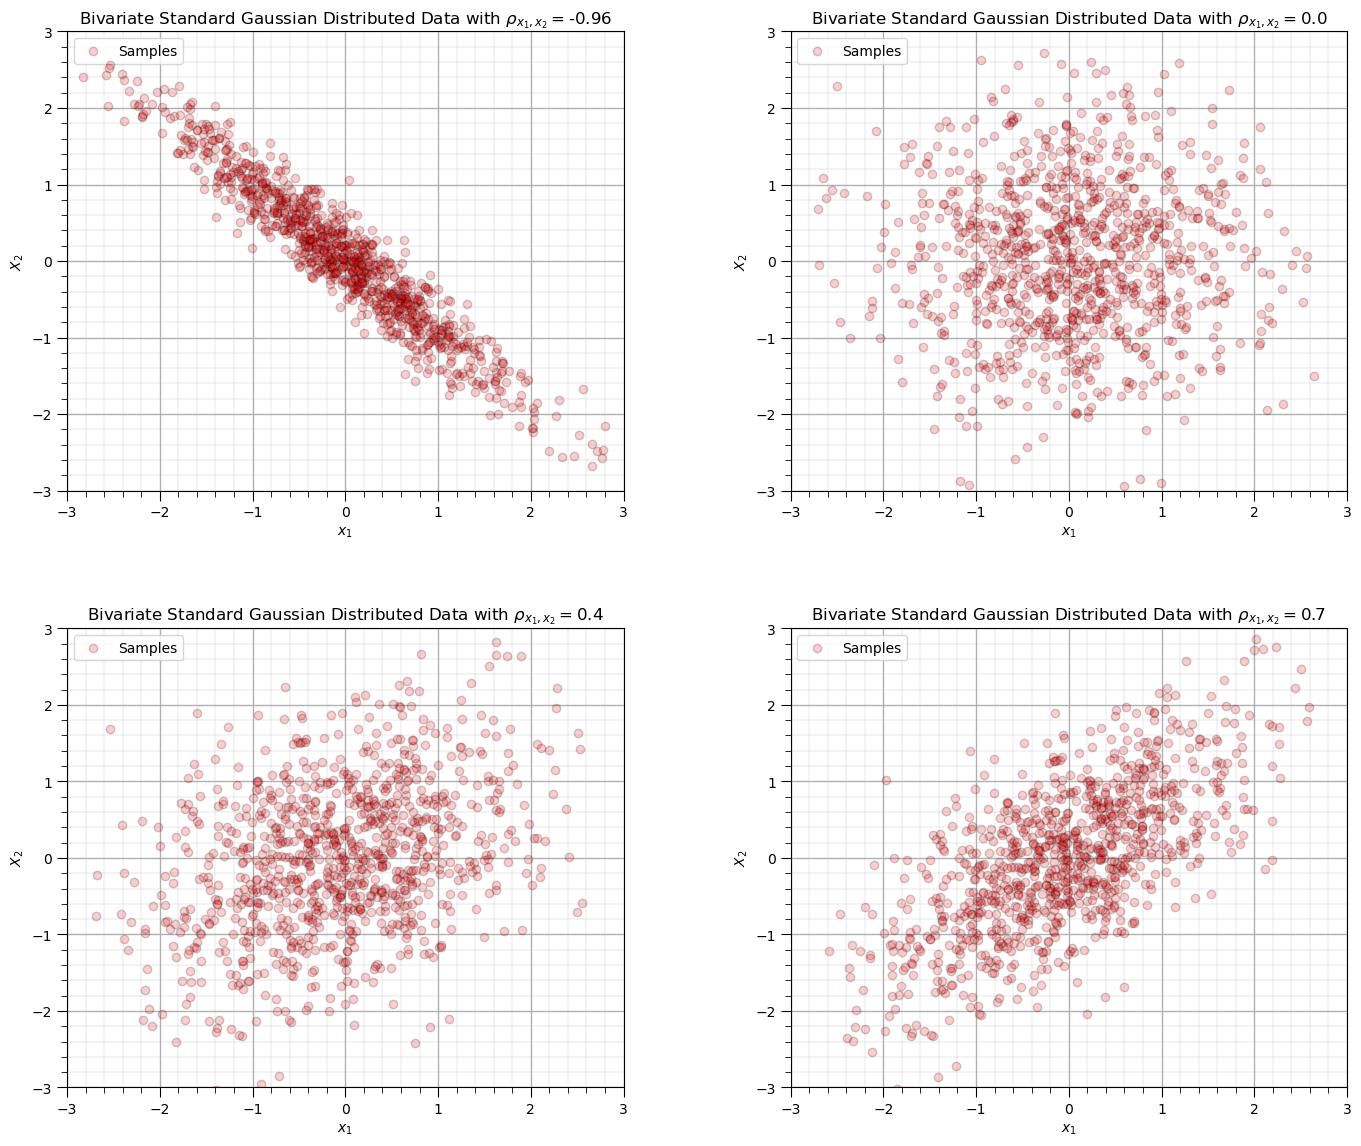

In [28]:
corr_mat = [-0.96,0.0,0.4,0.7]; ndata = 1000                   # set the correlation coefficient, number of samples

for i, corr in enumerate(corr_mat):
    plt.subplot(2,2,i+1)
    mean = np.array([0,0])                                     # make the bivariate Gaussian data
    correl = np.array([[1.0,corr],[corr,1.0]],dtype=float)
    np.random.seed(seed = seed)
    sample = np.random.multivariate_normal(mean,correl,size = ndata)
    plt.scatter(sample[:,0],sample[:,1],color = 'red',alpha = 0.2,edgecolors='black',label = 'Samples',zorder=100)
    plt.xlim([-3.0,3.0]); plt.ylim([-3.0,3.0])
    plt.xlabel(r'$x_1$'); plt.ylabel(r'$X_2$'); plt.legend(loc='upper left'); add_grid()
    plt.title(r'Bivariate Standard Gaussian Distributed Data with $\rho_{x_1,x_2} =$' + str(np.round(corr,2)))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.3, hspace=0.3); plt.show() 

#### Impact of Outliers on Correlation Coefficients

Let's observe the impact of a single outlier on the correlation coefficient.

* compare Person product moment and Spearman rank correlation coefficient

How to run this example?

* set the original data correlation, defaulted as 0.0, no correlation

* set the number of data in the original sample with correlation

* set the sample $x_{n+1},y_{n+1}$, to be appended to the data as potentially an outlier

For the case that I designed you will observe,

* when the new sample is in the middle of the previous data there is not a significant impact on either correlation statistic

* when as the new sample moves further from the sample data the correlation coefficient increases while the rank correlation coefficient remains close to the original sample correlation, it is more robust in the presence of outliers

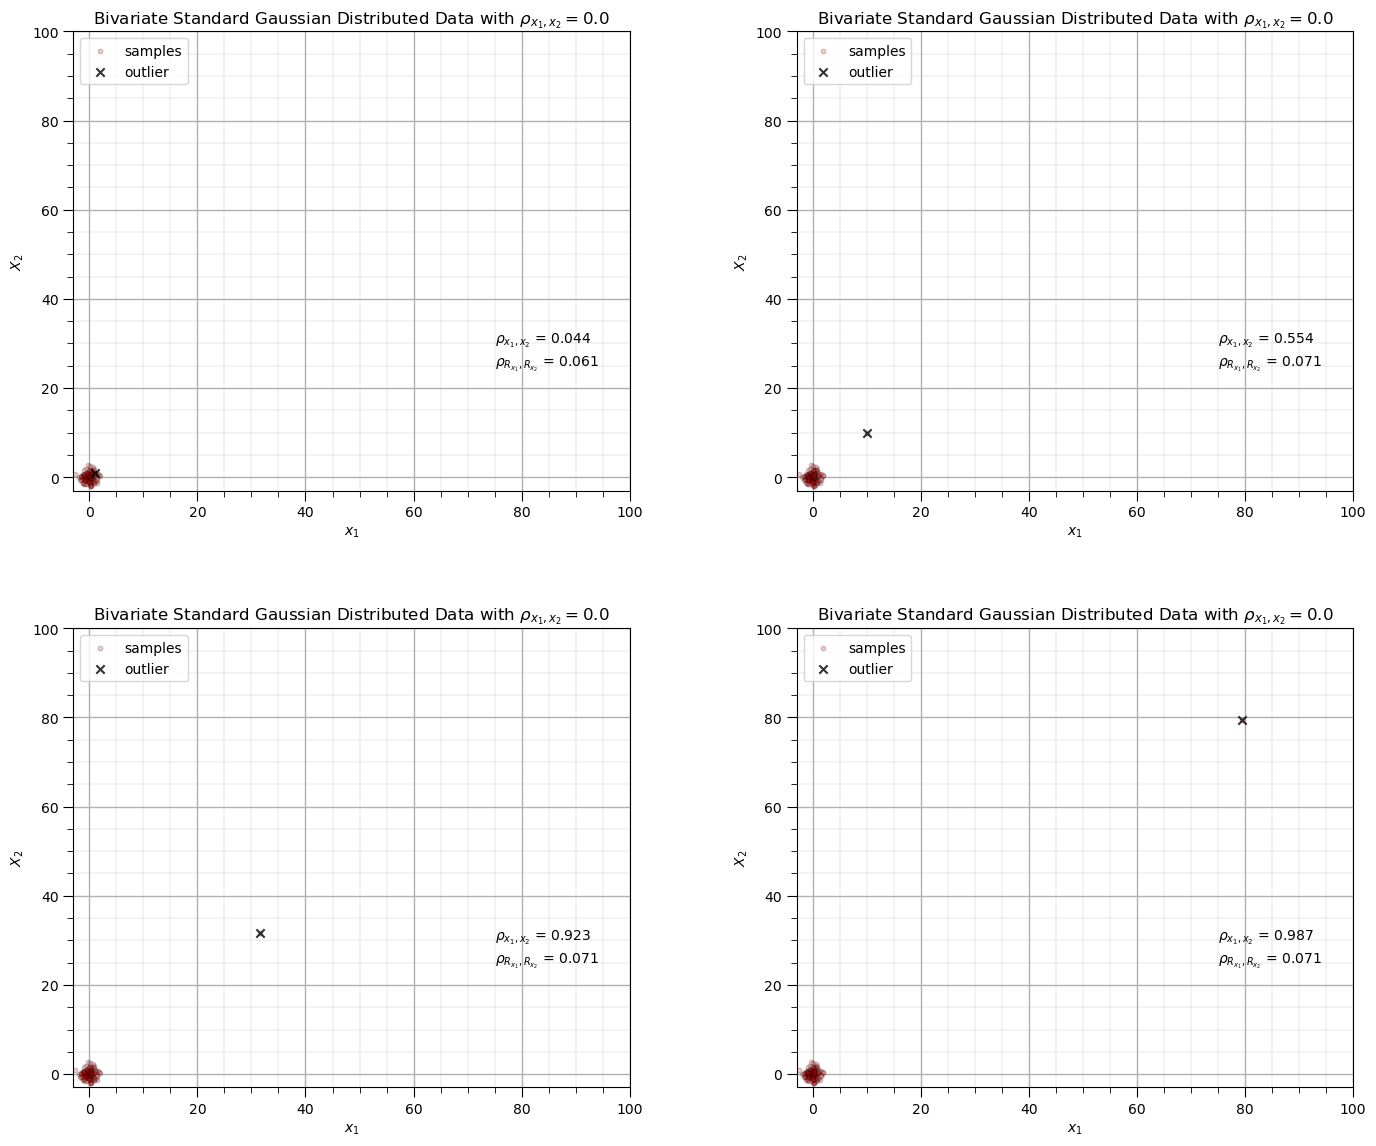

In [31]:
corr = 0.0; outlier_mat = [0,1,1.5,1.9]; ndata = 100           # set the correlation coefficient, number of samples

for i, outlier in enumerate(outlier_mat):
    plt.subplot(2,2,i+1)
    mean = np.array([0,0])                                     # make the bivariate Gaussian data
    correl = np.array([[1.0,corr],[corr,1.0]],dtype=float)
    np.random.seed(seed = seed)
    sample = np.random.multivariate_normal(mean,correl,size = ndata)
    sample = np.vstack([sample, [pow(10.0,outlier),pow(10.0,outlier)]]) # add outlier
    plt.scatter(sample[:,0],sample[:,1],color = 'red',alpha = 0.2,edgecolors='black',s=10,label = 'samples',zorder=100) # plot result
    plt.scatter(sample[-1,0],sample[-1,1],color = 'black',alpha = 0.8,marker = 'x',label = 'outlier', zorder=200)
    plt.xlim([-3.0,100.0]); plt.ylim([-3.0,100.0])
    plt.xlabel(r'$x_1$'); plt.ylabel(r'$X_2$'); plt.legend(loc='upper left'); add_grid()
    plt.title(r'Bivariate Standard Gaussian Distributed Data with $\rho_{x_1,x_2} =$' + str(np.round(corr,2)))
    pearson_corr = pearsonr(sample[:,0],sample[:,1])[0]
    rank_corr = spearmanr(sample[:,0],sample[:,1])[0]
    plt.annotate(r'$\rho_{x_1,x_2}$ = ' + str(np.round(pearson_corr,3)),[75.0,30.0])
    plt.annotate(r'$\rho_{R_{x_1},R_{x_2}}$ = ' + str(np.round(rank_corr,3)),[75.0,25.0])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.3, hspace=0.3); plt.show() 

We are ready to load some data and work with bivariate and multivariate statistics.

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [39]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

Let's load the provided multivariate, spatial dataset 'sample_data_MV_biased.csv'. It is a comma delimited file with: 

* X and Y coordinates ($m$)
* facies 0 and 1 
* porosity (fraction)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$). 

In [42]:
#df = pd.read_csv('sample_data_MV_biased.csv')                # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv')
df = df.iloc[:,1:]

#### Visualize the DataFrame

Visualizing the DataFrame is useful.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

* add parameter 'n=13' to see the first 13 rows of the dataset.  

In [45]:
df.head(n=13)                                                 # we could also use this command for a table preview

,X,Y,Facies,Porosity,Perm,AI
0,100.0,900.0,0.0,0.101319,1.996868,5590.417154
1,100.0,800.0,1.0,0.147676,10.711789,3470.845666
2,100.0,700.0,1.0,0.145912,17.818143,3586.988513
3,100.0,600.0,1.0,0.186167,217.109365,3732.114787
4,100.0,500.0,1.0,0.146088,16.717367,2534.551236
5,200.0,900.0,1.0,0.129949,23.348473,4781.590782
6,200.0,700.0,1.0,0.185299,595.674540,4729.017454
7,200.0,600.0,1.0,0.164923,154.555841,2147.668805
8,200.0,500.0,1.0,0.167026,50.970899,4583.679953
9,200.0,400.0,1.0,0.125382,4.061772,4477.930200


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. 

* We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [48]:
df.describe().transpose()                                     # DataFrame summary statistics

,count,mean,std,min,25%,50%,75%,max
X,368.0,499.565217,289.770794,0.000000,240.000000,500.000000,762.500000,990.000000
Y,368.0,520.644022,277.412187,9.000000,269.000000,539.000000,769.000000,999.000000
Facies,368.0,0.597826,0.491004,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,368.0,0.127026,0.030642,0.041122,0.103412,0.125842,0.148623,0.210258
Perm,368.0,85.617362,228.362654,0.094627,2.297348,10.377292,50.581288,1991.097723
AI,368.0,4791.736646,974.560569,1981.177309,4110.728374,4713.325533,5464.043562,7561.250336


#### Visualizing Tabular Data with Location Maps 

It is natural to set the x and y coordinate and feature ranges manually, e.g. do you want your color bar to go from 0.05887 to 0.24230 exactly? Also, let's pick a color map for display. 

* I heard that plasma is known to be friendly to the color blind as the color and intensity vary together (hope I got that right, it was an interesting Twitter conversation started by Matt Hall from Agile if I recall correctly).
* We will assume a study area of 0 to 1,000m in x and y and omit any data outside this area.

In [51]:
xmin = 0.0; xmax = 1000.0                                     # range of x values
ymin = 0.0; ymax = 1000.0                                     # range of y values
pormin = 0.05; pormax = 0.25;                                 # range of porosity values
permmin = 0.01; permmax = 2000.0                              # range of permeability values
AImin = 2000.0; AImax = 8000.0                                # range of AI values
nx = 100; ny = 100; csize = 10.0                      

Let's try out locmap. This is a reimplementation of GSLIB's locmap program that uses matplotlib. I hope you find it simpler than matplotlib, if you want to get more advanced and build custom plots lock at the source. If you improve it, send me the new code. 

Now we can populate the plotting parameters and visualize the porosity data.

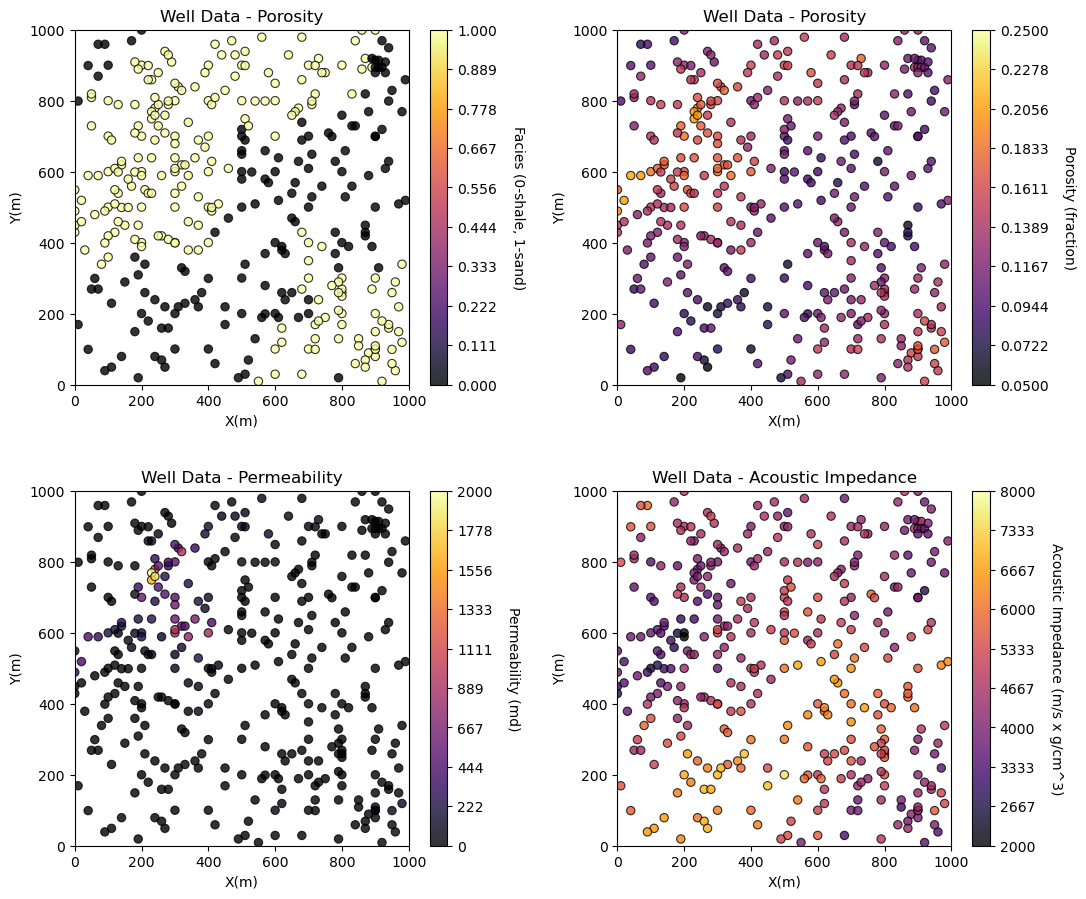

In [54]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Facies',xmin,xmax,ymin,ymax,0,1,'Well Data - Porosity','X(m)','Y(m)','Facies (0-shale, 1-sand)',cmap)

plt.subplot(222)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','Perm',xmin,xmax,ymin,ymax,permmin,permmax,'Well Data - Permeability','X(m)','Y(m)','Permeability (md)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','AI',xmin,xmax,ymin,ymax,AImin,AImax,'Well Data - Acoustic Impedance','X(m)','Y(m)','Acoustic Impedance (m/s x g/cm^3)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.3, hspace=0.3); plt.show()

#### Bivariate Analysis

Let's start with simple bivariate scatter plots, and calculating bivariate statistics. Here's the scatter plots.

* I included code below (commented out) for writing the plot as an image file. Note, you can write to many different formats, e.g., .tif, jpg, etc. and you can also control the resolution.

* by saving in .pdf, .svg, or eps formats you create vector graphics that retain their sharpness at any resolution with economy of file size

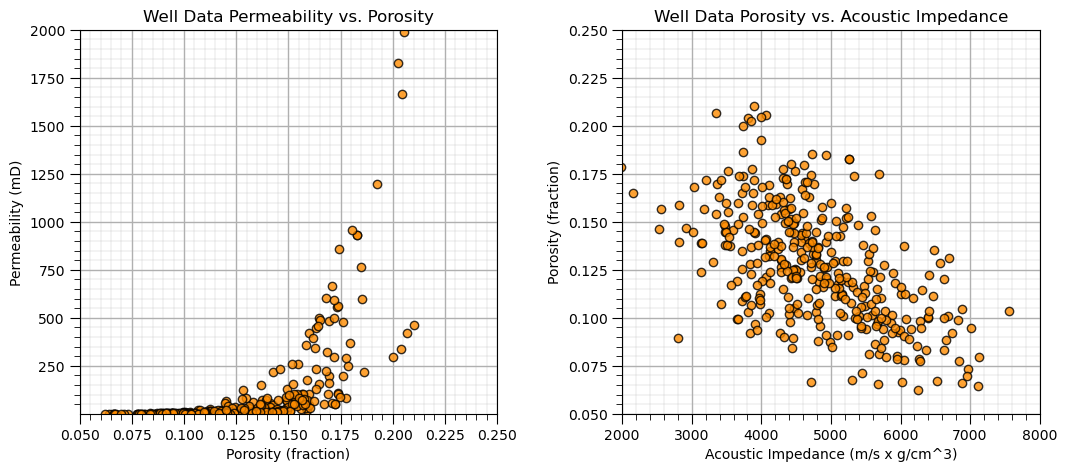

In [57]:
plt.subplot(121)
plt.plot(df['Porosity'].values,df['Perm'].values, 'o', label='', markerfacecolor='darkorange', markeredgecolor='black', alpha=0.8)
plt.title('Well Data Permeability vs. Porosity')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Permeability (mD)')
plt.xlim([pormin,pormax]); plt.ylim([permmin,permmax]); add_grid()

plt.subplot(122)
plt.plot(df['AI'].values,df['Porosity'].values, 'o', label='', markerfacecolor='darkorange', markeredgecolor='black', alpha=0.8)
plt.title('Well Data Porosity vs. Acoustic Impedance')
plt.ylabel('Porosity (fraction)'); plt.xlabel('Acoustic Impedance (m/s x g/cm^3)')
plt.xlim([AImin,AImax]); plt.ylim([pormin,pormax]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

#### Correlation and Covariance

It is straight forward to calculate the covariance and correlation from the pairs of data in our dataset. Here's the covariance matrix.  

* Notice that the matrix is symmetrical? Makes sense, as the $C_{Por,Perm} = C_{Perm,Por}$.
* Also, note that the diagonal values ($C_{i,j}$ where $i=j$) equal to the variance.

We check porosity by calculating the variance.

In [60]:
print(df.iloc[:,3:7].cov())                                   # the covariance matrix for columns 3,4,5 and 6 and all rows
print('The variance of porosity is ' + str(round(np.var(df['Porosity'].values),6)))

           Porosity          Perm             AI
Porosity   0.000939      4.055029     -17.132244
Perm       4.055029  52149.501968  -46471.695092
AI       -17.132244 -46471.695092  949768.302409
The variance of porosity is 0.000936


Here's the correlation coefficient matrix.

In [66]:
df.iloc[:,3:7].corr()                                         # correlation matrix

,Porosity,Perm,AI
Porosity,1.000000,0.579493,-0.573700
Perm,0.579493,1.000000,-0.208812
AI,-0.573700,-0.208812,1.000000


#### Visualize the Correlation Matrix

It is convenient to visualize the correlation matrix as follows.

* I added a custom colour bar to communicate significance. Demonstration only, I did not calculate confidence intervals, but that could be added.

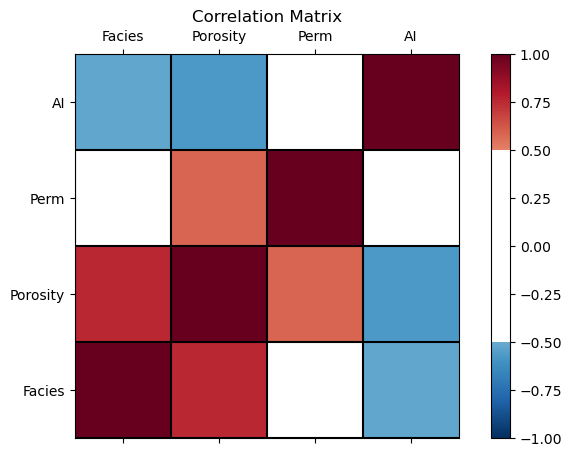

In [72]:
corr_matrix = df.iloc[:,2:].corr()
plt.subplot(111)
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.5)           # using our correlation matrix visualization function
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

To calculate a single correlation coefficient with the associate p-value for significance testing we can use SciPy's pearsonr function.

* the p-value indicates the $\alpha$ level at which we would reject the null hypothesis that the correlation coefficient is actually 0.0 and the value is due to random effect

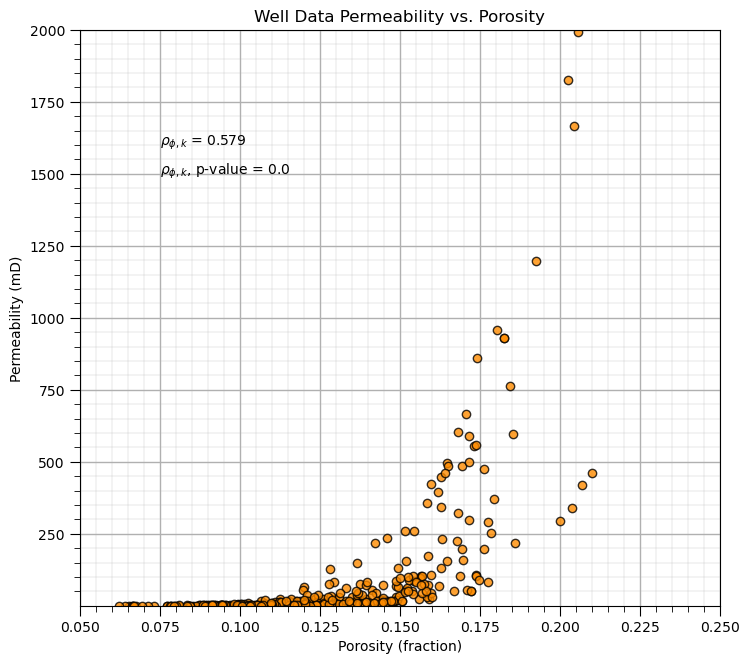

In [77]:
corr, corr_p_value = pearsonr(df['Porosity'],df['Perm'])

plt.subplot(111)
plt.plot(df['Porosity'].values,df['Perm'].values, 'o', label='', markerfacecolor='darkorange', markeredgecolor='black', alpha=0.8)
plt.title('Well Data Permeability vs. Porosity')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Permeability (mD)')
plt.xlim([pormin,pormax]); plt.ylim([permmin,permmax]); add_grid()

plt.annotate(r'$\rho_{\phi,k}$ = ' + str(np.round(corr,3)),[0.075,1600.0])
plt.annotate(r'$\rho_{\phi,k}$, p-value = ' + str(np.round(corr_p_value,20)),[0.075,1500.0])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.3, hspace=0.2); plt.show()

The p-value of the porosity and permeability correlation coefficient is 2.1569195170201772e-34,

* correlation is significantly different from 0.0 for any feasible alpha level

#### Spearman's Rank Correlation Coefficient

The Spearman’s rank correlation coefficient, provides a measure of the degree of monotonic relationship.

* Rank transform, e.g. $R_(x_i)$, sort the data in ascending order and replace the data with the index, $i=1,\ldots,n.
* Spearman’s rank correlation coefficient is more robust in the presence of outliers and some nonlinear features than the Pearson’s correlation coefficient

Let's try out the rank correlation coefficient with SciPy's stats module function.

* it also provides a p-value for each measure for significance testing, i.e., if p-value < alpha then we reject the null hypothesis that the rank correlation coefficient is 0.0.

In [86]:
rank_correlation, rank_correlation_pval = stats.spearmanr(df.iloc[:,2:]) # calculate the range correlation coefficient
rank_matrix = pd.DataFrame(rank_correlation,columns=corr_matrix.columns)
print('Rank Correlation:')
print(rank_correlation)
print('\nRank Correlation p-value:')
print(rank_correlation_pval)

Rank Correlation:
[[ 1.          0.79973189  0.71923703 -0.50503617]
 [ 0.79973189  1.          0.88314655 -0.56863773]
 [ 0.71923703  0.88314655  1.         -0.34876935]
 [-0.50503617 -0.56863773 -0.34876935  1.        ]]

Rank Correlation p-value:
[[0.00000000e+000 4.11417796e-083 7.49150387e-060 3.24513314e-025]
 [4.11417796e-083 0.00000000e+000 2.26847950e-122 6.59769641e-033]
 [7.49150387e-060 2.26847950e-122 0.00000000e+000 5.77157354e-012]
 [3.24513314e-025 6.59769641e-033 5.77157354e-012 0.00000000e+000]]


#### Compare Pearson and Spearman Correlation

Let's make a simple random dataset and add an outlier and then compare Pearson and Spearman correlation coefficients.

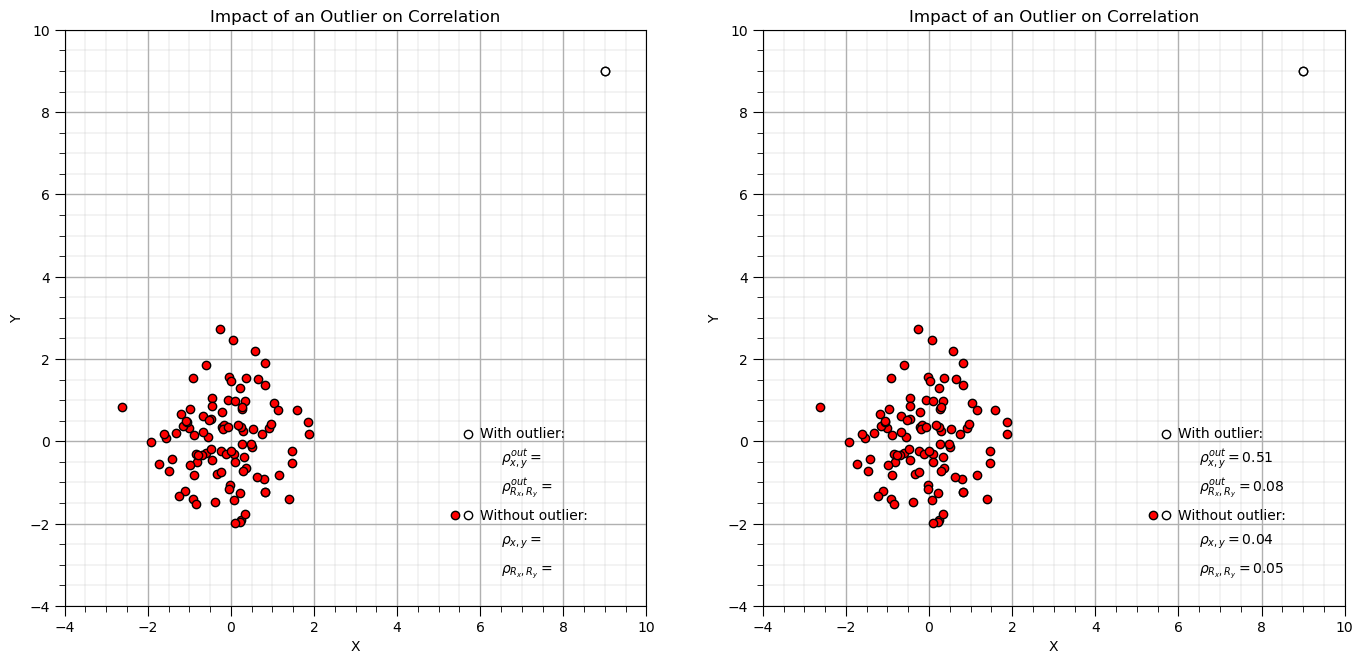

In [89]:
corr = 0.0; xout = 9; yout = 9; n = 100                       # correlation, outlier datum, and total number of data
mean = [0, 0]                                                 # bivariate Gaussian mean vector
cov = [[1, corr], [corr, 1]]                                  # bivariate Gaussian covariance matrix

np.random.seed(seed = seed)                                   # set seed for repeatability
samples = np.random.multivariate_normal(mean, cov, n)         # random samples from bivariate Gaussian
samples[-1,0] = xout; samples[-1,1] = yout                    # replace last sample with user specified outlier
x2 = samples[:, 0]; y2 = samples[:, 1]                        # copy x and y for compact code

corr = stats.pearsonr(x2[:-1],y2[:-1])[0]                     # calculate Pearson and Spearman correlation without outlier
rank_corr = stats.spearmanr(x2[:-1],y2[:-1])[0] 
corr_out = stats.pearsonr(x2,y2)[0]                           # calculate Pearson and Spearman correlation with outlier
rank_corr_out = stats.spearmanr(x2,y2)[0]

plt.subplot(121)
plt.scatter(x2,y2,color='red',edgecolor='black',zorder=1)     # plot and annotate results
plt.scatter(x2[-1],y2[-1],color='white',edgecolor='black',zorder=10)
plt.scatter([5.7,5.7],[0.17,-1.8],color='white',edgecolor='black',zorder=1) 
plt.scatter([5.4],[-1.8],color='red',edgecolor='black',zorder=1) 
plt.annotate('With outlier:',[6.0,0.1])
plt.annotate(r'$\rho^{out}_{x,y} = $',[6.5,-0.5])
plt.annotate(r'$\rho^{out}_{R_x,R_y} = $',[6.5,-1.2])
plt.annotate('Without outlier:',[6.0,-1.9])
plt.annotate(r'$\rho_{x,y} = $',[6.5,-2.5])
plt.annotate(r'$\rho_{R_x,R_y} = $',[6.5,-3.2])
plt.xlim([-4,10]); plt.ylim([-4,10]); plt.xlabel('X'); plt.ylabel('Y'); add_grid(); plt.title('Impact of an Outlier on Correlation')

plt.subplot(122)
plt.scatter(x2,y2,color='red',edgecolor='black',zorder=1)       # plot and annotate results
plt.scatter(x2[-1],y2[-1],color='white',edgecolor='black',zorder=10)
plt.scatter([5.7,5.7],[0.17,-1.8],color='white',edgecolor='black',zorder=1) 
plt.scatter([5.4],[-1.8],color='red',edgecolor='black',zorder=1) 
plt.annotate('With outlier:',[6.0,0.1])
plt.annotate(r'$\rho^{out}_{x,y} = $' + str(round(corr_out,2)),[6.5,-0.5])
plt.annotate(r'$\rho^{out}_{R_x,R_y} = $' + str(round(rank_corr_out,2)),[6.5,-1.2])
plt.annotate('Without outlier:',[6.0,-1.9])
plt.annotate(r'$\rho_{x,y} = $' + str(round(corr,2)),[6.5,-2.5])
plt.annotate(r'$\rho_{R_x,R_y} = $' + str(round(rank_corr,2)),[6.5,-3.2])
plt.xlim([-4,10]); plt.ylim([-4,10]); plt.xlabel('X'); plt.ylabel('Y'); add_grid(); plt.title('Impact of an Outlier on Correlation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

Now let's look at what Spearman correlation sees, by plotting the rank transform of the data.

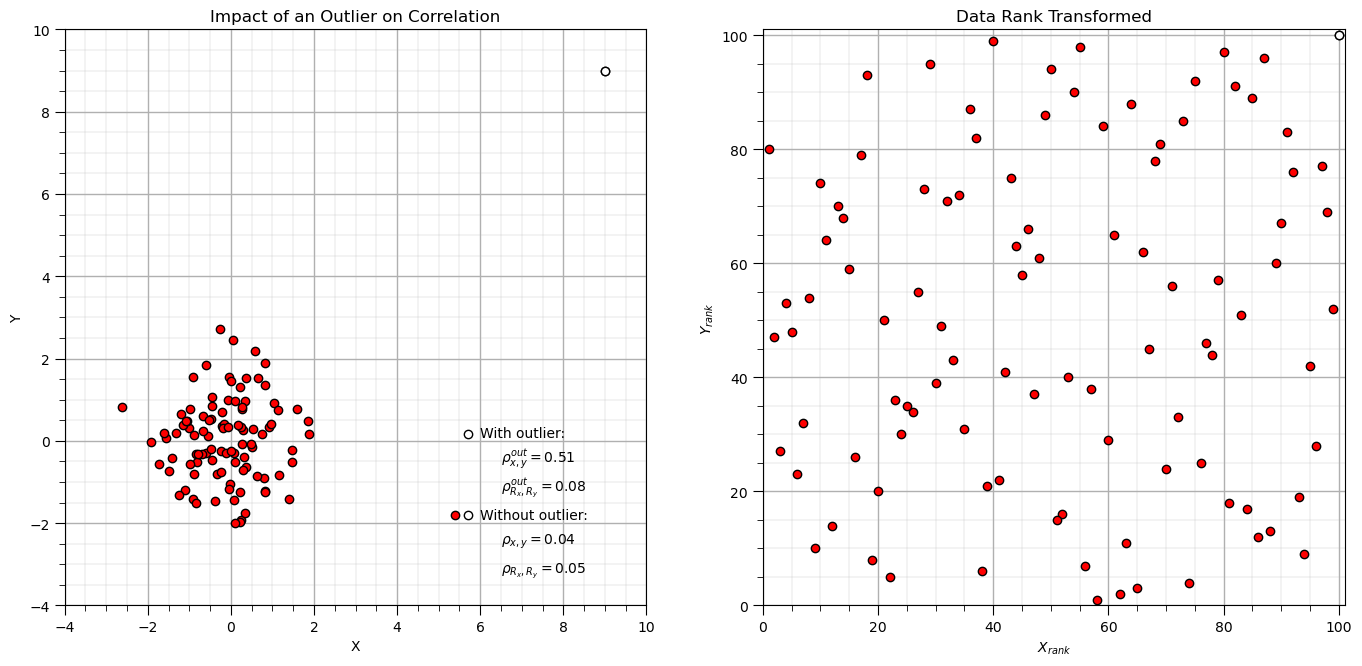

In [92]:
x2_rank = rankdata(x2)                                          # rank transform data, x and y separately
y2_rank = rankdata(y2)

plt.subplot(121)
plt.scatter(x2,y2,color='red',edgecolor='black',zorder=1)       # plot and annotate results
plt.scatter(x2[-1],y2[-1],color='white',edgecolor='black',zorder=10)
plt.scatter([5.7,5.7],[0.17,-1.8],color='white',edgecolor='black',zorder=1) 
plt.scatter([5.4],[-1.8],color='red',edgecolor='black',zorder=1) 
plt.annotate('With outlier:',[6.0,0.1])
plt.annotate(r'$\rho^{out}_{x,y} = $' + str(round(corr_out,2)),[6.5,-0.5])
plt.annotate(r'$\rho^{out}_{R_x,R_y} = $' + str(round(rank_corr_out,2)),[6.5,-1.2])
plt.annotate('Without outlier:',[6.0,-1.9])
plt.annotate(r'$\rho_{x,y} = $' + str(round(corr,2)),[6.5,-2.5])
plt.annotate(r'$\rho_{R_x,R_y} = $' + str(round(rank_corr,2)),[6.5,-3.2])
plt.xlim([-4,10]); plt.ylim([-4,10]); plt.xlabel('X'); plt.ylabel('Y'); add_grid(); plt.title('Impact of an Outlier on Correlation')

plt.subplot(122)
plt.scatter(x2_rank,y2_rank,color='red',edgecolor='black',zorder=1) # plot and annotate results
plt.scatter(x2_rank[-1],y2_rank[-1],color='white',edgecolor='black',zorder=10)
plt.xlim([0,n+1]); plt.ylim([0,n+1]); plt.xlabel(r'$X_{rank}$'); plt.ylabel(r'$Y_{rank}$'); add_grid(); plt.title('Data Rank Transformed')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

#### Compare Pearson and Spearman Correlation with a Parabola

Let's try the famous parabola example that is commonly used to demonstrate the impact of nonlinearity on correlation.

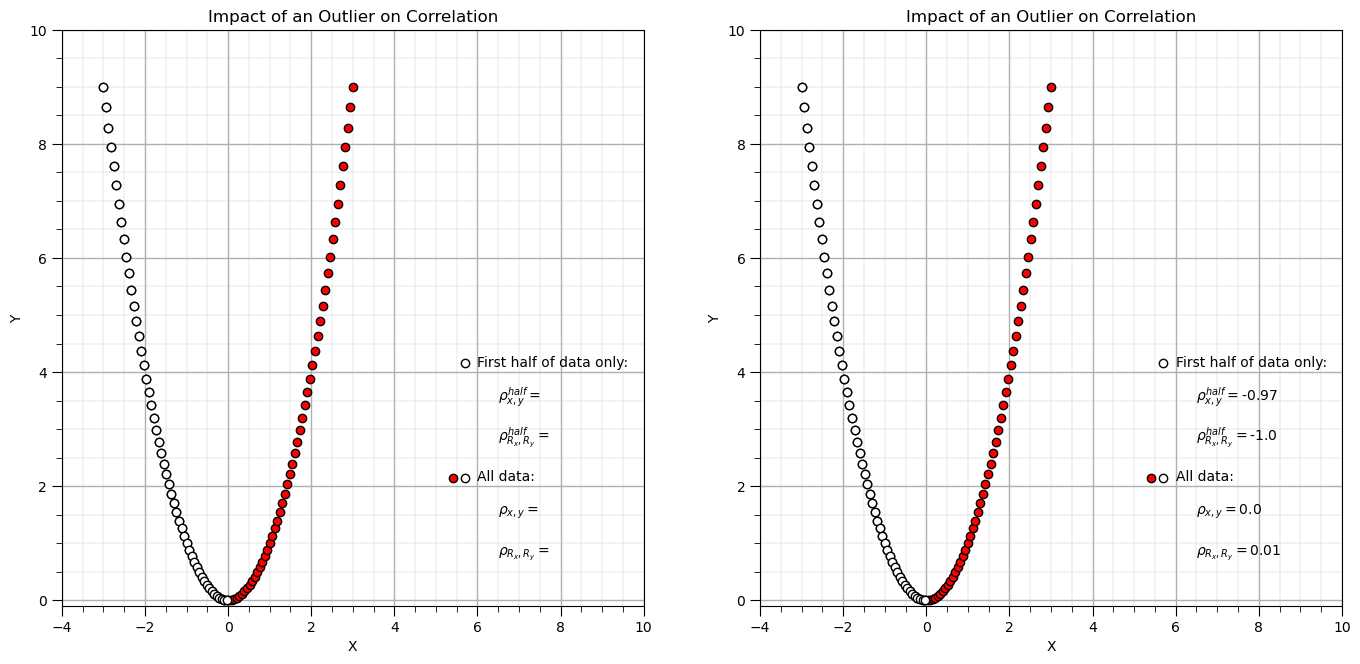

In [95]:
x3 = np.linspace(-3.0,3.0,n)
y3 = x3**2

corr = stats.pearsonr(x3,y3)[0]                               # calculate Pearson and Spearman correlation with outlier
rank_corr = stats.spearmanr(x3,y3)[0]

corr_half = stats.pearsonr(x3[:-50],y3[:-50])[0]              # calculate Pearson and Spearman correlation with outlier
rank_corr_half = stats.spearmanr(x3[:-50],y3[:-50])[0]

plt.subplot(121)
plt.scatter(x3,y3,color='red',edgecolor='black',zorder=1)     # plot and annotate results
plt.scatter(x3[:-50],y3[:-50],color='white',edgecolor='black',zorder=10) # first half
plt.scatter([5.7,5.7],[4.15,2.15],color='white',edgecolor='black',zorder=1) 
plt.scatter([5.4],[2.15],color='red',edgecolor='black',zorder=1) 
plt.annotate('First half of data only:',[6.0,4.1])
plt.annotate(r'$\rho^{half}_{x,y} = $',[6.5,3.5])
plt.annotate(r'$\rho^{half}_{R_x,R_y} = $',[6.5,2.8])
plt.annotate('All data:',[6.0,2.1])
plt.annotate(r'$\rho_{x,y} = $',[6.5,1.5])
plt.annotate(r'$\rho_{R_x,R_y} = $',[6.5,0.8])
plt.xlim([-4,10]); plt.ylim([-0.1,10]); plt.xlabel('X'); plt.ylabel('Y'); add_grid(); plt.title('Impact of an Outlier on Correlation')

plt.subplot(122)
plt.scatter(x3,y3,color='red',edgecolor='black',zorder=1)     # plot and annotate results
plt.scatter(x3[:-50],y3[:-50],color='white',edgecolor='black',zorder=10) # first half
plt.scatter([5.7,5.7],[4.15,2.15],color='white',edgecolor='black',zorder=1) 
plt.scatter([5.4],[2.15],color='red',edgecolor='black',zorder=1) 
plt.annotate('First half of data only:',[6.0,4.1])
plt.annotate(r'$\rho^{half}_{x,y} = $' + str(round(corr_half,2)),[6.5,3.5])
plt.annotate(r'$\rho^{half}_{R_x,R_y} = $' + str(round(rank_corr_half,2)),[6.5,2.8])
plt.annotate('All data:',[6.0,2.1])
plt.annotate(r'$\rho_{x,y} = $' + str(round(corr,2)),[6.5,1.5])
plt.annotate(r'$\rho_{R_x,R_y} = $' + str(round(rank_corr,2)),[6.5,0.8])
plt.xlim([-4,10]); plt.ylim([-0.1,10]); plt.xlabel('X'); plt.ylabel('Y'); add_grid(); plt.title('Impact of an Outlier on Correlation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

Now let's look at what Spearman correlation sees, by plotting the rank transform of the data.

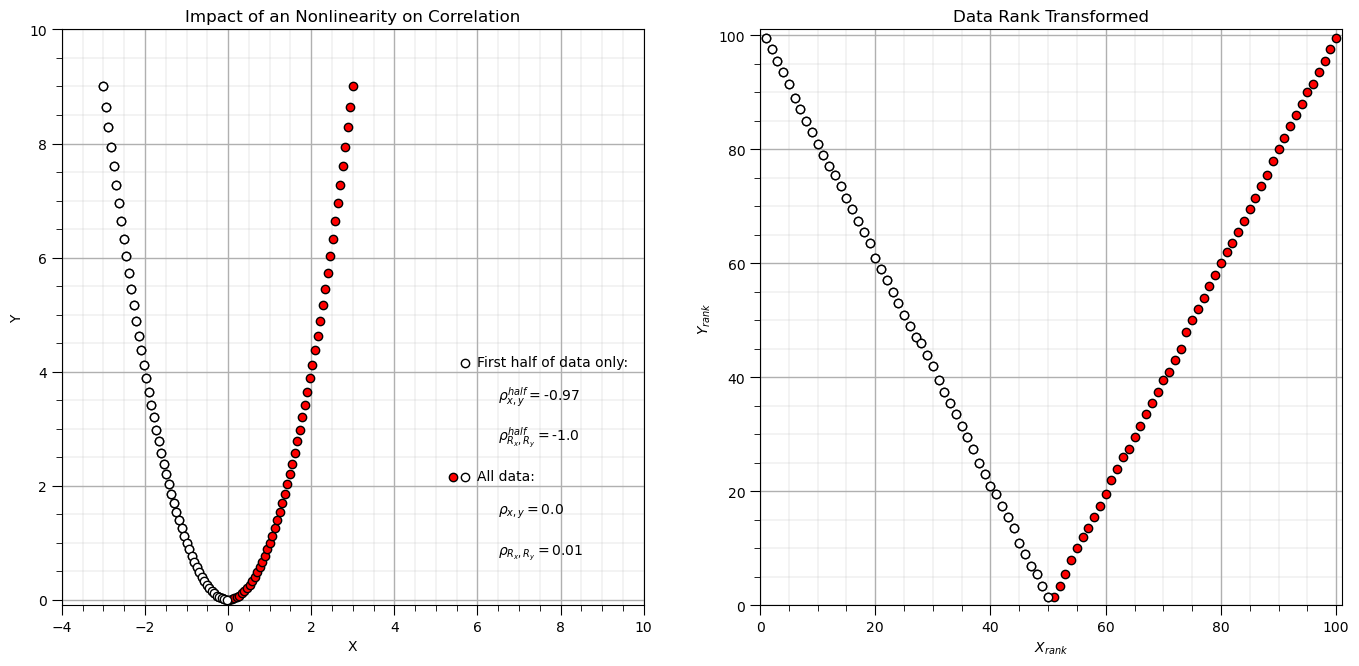

In [98]:
x3_rank = rankdata(x3)                                        # rank transform data, x and y separately
y3_rank = rankdata(y3)

plt.subplot(121)
plt.scatter(x3,y3,color='red',edgecolor='black',zorder=1)     # plot and annotate results
plt.scatter(x3[:-50],y3[:-50],color='white',edgecolor='black',zorder=10) # first half
plt.scatter([5.7,5.7],[4.15,2.15],color='white',edgecolor='black',zorder=1) 
plt.scatter([5.4],[2.15],color='red',edgecolor='black',zorder=1) 
plt.annotate('First half of data only:',[6.0,4.1])
plt.annotate(r'$\rho^{half}_{x,y} = $' + str(round(corr_half,2)),[6.5,3.5])
plt.annotate(r'$\rho^{half}_{R_x,R_y} = $' + str(round(rank_corr_half,2)),[6.5,2.8])
plt.annotate('All data:',[6.0,2.1])
plt.annotate(r'$\rho_{x,y} = $' + str(round(corr,2)),[6.5,1.5])
plt.annotate(r'$\rho_{R_x,R_y} = $' + str(round(rank_corr,2)),[6.5,0.8])
plt.xlim([-4,10]); plt.ylim([-0.1,10]); plt.xlabel('X'); plt.ylabel('Y'); add_grid(); plt.title('Impact of an Nonlinearity on Correlation')

plt.subplot(122)
plt.scatter(x3_rank,y3_rank,color='red',edgecolor='black',zorder=1) # plot and annotate results
plt.scatter(x3_rank[:-50],y3_rank[:-50],color='white',edgecolor='black',zorder=10)
plt.xlim([0,n+1]); plt.ylim([0,n+1]); plt.xlabel(r'$X_{rank}$'); plt.ylabel(r'$Y_{rank}$'); add_grid(); plt.title('Data Rank Transformed')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

Rank transforms can linearize monotonic increasing or decreasing segments of the data.

#### Correlation with Multiple Populations

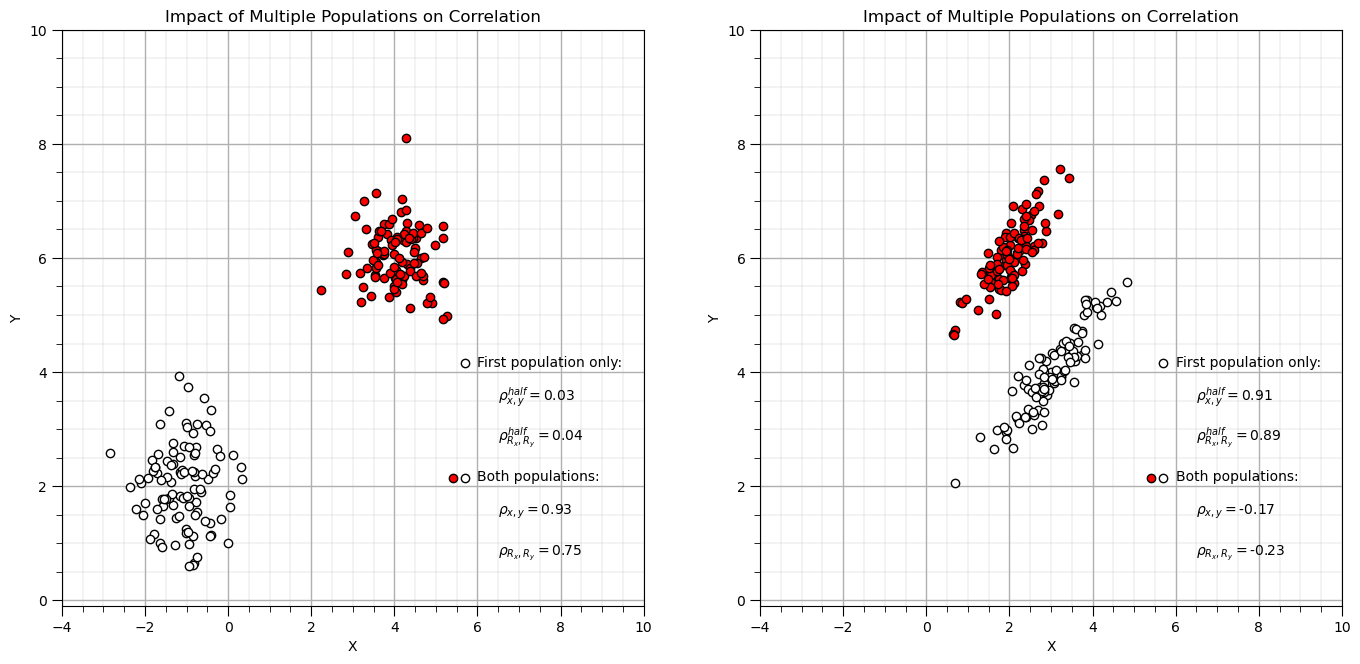

In [101]:
n = 100                                                        # total number in each population
np.random.seed(seed = seed)                                   # set seed for repeatability
mean4 = [-1.0, 2.0]                                                 # bivariate Gaussian mean vector
cov4 = [[0.5, 0.0], [0.0, 0.5]]                               # bivariate Gaussian covariance matrix
samples4 = np.random.multivariate_normal(mean4, cov4, n)        # random samples from bivariate Gaussian

mean5 = [4.0, 6.0]                                                 # bivariate Gaussian mean vector
cov5 = [[0.3, 0.0], [0.0, 0.3]]                               # bivariate Gaussian covariance matrix
samples5 = np.random.multivariate_normal(mean5, cov5, n)        # random samples from bivariate Gaussian

samples45 = np.vstack((samples4,samples5))

corr = stats.pearsonr(samples45[:,0],samples45[:,1])[0]                               # calculate Pearson and Spearman correlation with outlier
rank_corr = stats.spearmanr(samples45[:,0],samples45[:,1])[0]

corr_one = stats.pearsonr(samples4[:,0],samples4[:,1])[0]              # calculate Pearson and Spearman correlation with outlier
rank_corr_one = stats.spearmanr(samples4[:,0],samples4[:,1])[0]

plt.subplot(121)
plt.scatter(samples4[:,0],samples4[:,1],color='white',edgecolor='black',zorder=1)     # plot and annotate results
plt.scatter(samples5[:,0],samples5[:,1],color='red',edgecolor='black',zorder=1)     # plot and annotate results

plt.scatter([5.7,5.7],[4.15,2.15],color='white',edgecolor='black',zorder=1) 
plt.scatter([5.4],[2.15],color='red',edgecolor='black',zorder=1) 
plt.annotate('First population only:',[6.0,4.1])
plt.annotate(r'$\rho^{half}_{x,y} = $' + str(round(corr_one,2)),[6.5,3.5])
plt.annotate(r'$\rho^{half}_{R_x,R_y} = $' + str(round(rank_corr_one,2)),[6.5,2.8])
plt.annotate('Both populations:',[6.0,2.1])
plt.annotate(r'$\rho_{x,y} = $' + str(round(corr,2)),[6.5,1.5])
plt.annotate(r'$\rho_{R_x,R_y} = $' + str(round(rank_corr,2)),[6.5,0.8])
plt.xlim([-4,10]); plt.ylim([-0.1,10]); plt.xlabel('X'); plt.ylabel('Y'); add_grid(); plt.title('Impact of Multiple Populations on Correlation')

mean6 = [3.0, 4.0]                                                 # bivariate Gaussian mean vector
cov6 = [[0.5, 0.45], [0.45, 0.5]]                               # bivariate Gaussian covariance matrix
samples6 = np.random.multivariate_normal(mean6, cov6, n)        # random samples from bivariate Gaussian

mean7 = [2.0, 6.0]                                                 # bivariate Gaussian mean vector
cov7 = [[0.3, 0.25], [0.25, 0.3]]                               # bivariate Gaussian covariance matrix
samples7 = np.random.multivariate_normal(mean7, cov7, n)        # random samples from bivariate Gaussian

samples67 = np.vstack((samples6,samples7))

corr = stats.pearsonr(samples67[:,0],samples67[:,1])[0]                               # calculate Pearson and Spearman correlation with outlier
rank_corr = stats.spearmanr(samples67[:,0],samples67[:,1])[0]

corr_one = stats.pearsonr(samples6[:,0],samples6[:,1])[0]              # calculate Pearson and Spearman correlation with outlier
rank_corr_one = stats.spearmanr(samples6[:,0],samples6[:,1])[0]

plt.subplot(122)
plt.scatter(samples6[:,0],samples6[:,1],color='white',edgecolor='black',zorder=1)     # plot and annotate results
plt.scatter(samples7[:,0],samples7[:,1],color='red',edgecolor='black',zorder=1)     # plot and annotate results

plt.scatter([5.7,5.7],[4.15,2.15],color='white',edgecolor='black',zorder=1) 
plt.scatter([5.4],[2.15],color='red',edgecolor='black',zorder=1) 
plt.annotate('First population only:',[6.0,4.1])
plt.annotate(r'$\rho^{half}_{x,y} = $' + str(round(corr_one,2)),[6.5,3.5])
plt.annotate(r'$\rho^{half}_{R_x,R_y} = $' + str(round(rank_corr_one,2)),[6.5,2.8])
plt.annotate('Both populations:',[6.0,2.1])
plt.annotate(r'$\rho_{x,y} = $' + str(round(corr,2)),[6.5,1.5])
plt.annotate(r'$\rho_{R_x,R_y} = $' + str(round(rank_corr,2)),[6.5,0.8])
plt.xlim([-4,10]); plt.ylim([-0.1,10]); plt.xlabel('X'); plt.ylabel('Y'); add_grid(); plt.title('Impact of Multiple Populations on Correlation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

#### Simpson's Paradox

Data trend reverses or disappears when groups are combined (or separated).

To Be Added

#### Plot Correlation and Rank Correlation Matrices

Returning to our former dataset, let's make correlation matrices.

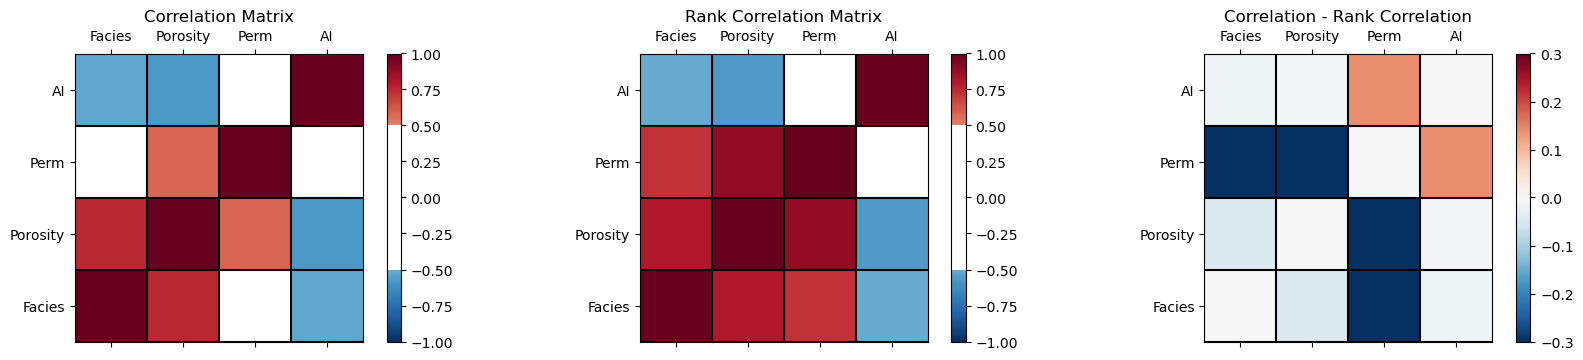

In [106]:
plt.subplot(131)                                              # plot correlation matrix with significance colormap
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.5)           # using our correlation matrix visualization function

plt.subplot(132)                                              # plot correlation matrix with significance colormap
plot_corr(rank_matrix,'Rank Correlation Matrix',1.0,0.5)      # using our correlation matrix visualization function

plt.subplot(133)                                              # plot correlation matrix with significance colormap
diff = corr_matrix.values - rank_matrix.values
diff_matrix = pd.DataFrame(diff,columns=corr_matrix.columns)
plot_corr(diff_matrix,'Correlation - Rank Correlation',0.3,0.0) # using our correlation matrix visualization function

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=0.6, wspace=0.2, hspace=0.3); plt.show()

From the correlation minus rank correlation heatmap we see,

* the nonlinearity is potentially decreasing the permeability correlation with facies and porosity, and increasing the correlation with AI.

#### Matrix Scatter Plots

If we have 3 or more variables to consider then matrix scatter plot offer an efficient method to display the multivariate relationships, 2 variables at a time.  Once can identify:

1. the range, envelope of the paired data
2. homoscedastic and heteroscedastic behaviors
3. nonlinear features

Here's the seaborn package matrix scatter plot function, pairplot. Let's color the results by facies.

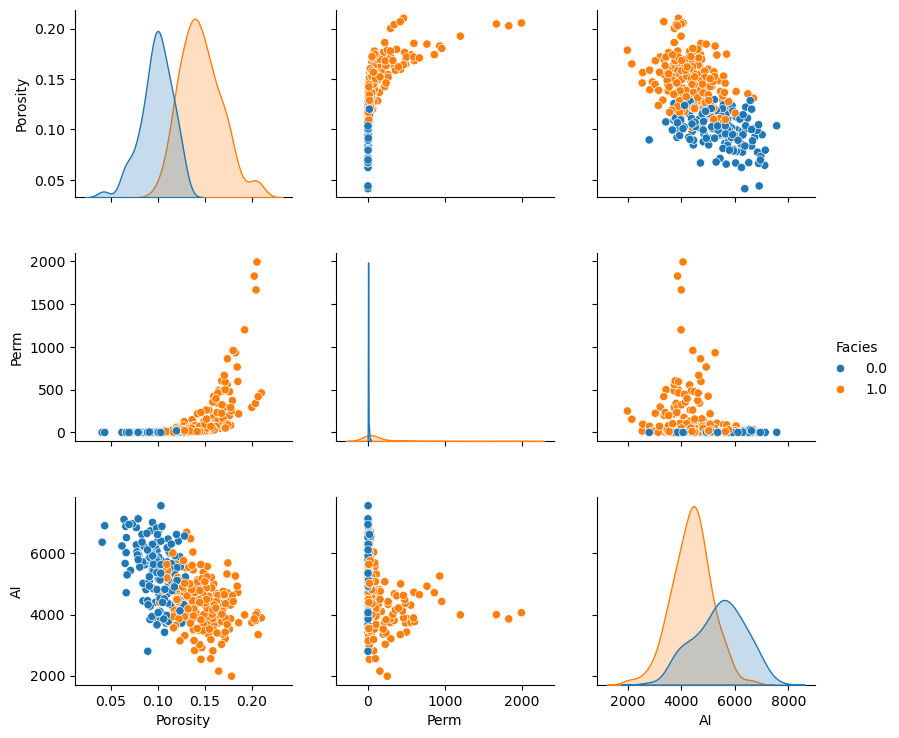

In [109]:
sns.pairplot(df, hue='Facies',vars=['Porosity','Perm','AI'],markers='o')
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.3); plt.show()

Remember, although these matrix scatterplots are very useful, they are still a bivariate marginalization of the higher dimensionality relationships. 

* There may be structures in the other dimensions that we do not see.

#### Pair Grid Plot

For maximum control of the resulting plot we can work with pair grid plots from seaborn.

* we can independently set lower, upper and diagonal components of the plot

We demonstrate this with all facies pooled together for:

* scatter plots for upper

* histograms for diagonal

* kernel density plots for the lower

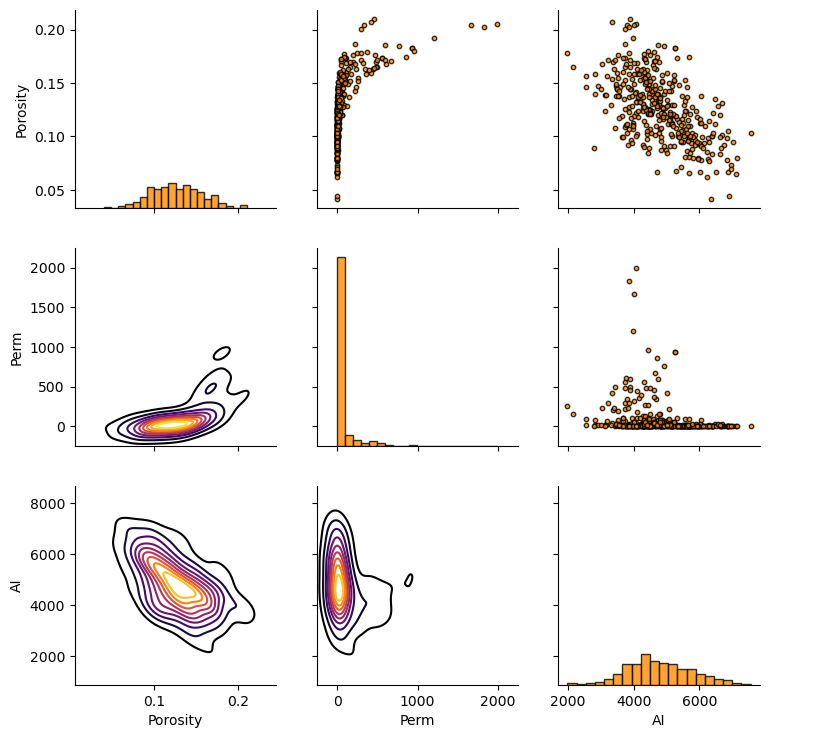

In [112]:
pairgrid = sns.PairGrid(df,vars=['Porosity','Perm','AI'])
pairgrid = pairgrid.map_upper(plt.scatter, color = 'darkorange', edgecolor = 'black', alpha = 0.8, s = 10)
pairgrid = pairgrid.map_diag(plt.hist, bins = 20, color = 'darkorange',alpha = 0.8, edgecolor = 'k')# Map a density plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap = plt.cm.inferno, 
                              shade = False, shade_lowest = False, alpha = 1.0, n_levels = 10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2); plt.show()

#### Joint, Conditional and Marginals

We can use kernel density estimation to estimate the joint probabilities density function (pdf) for the paired data, a 2D pdf! 

* We could use this to estimate any required joint, marginal and conditional probability (care must be taken with normalization).

Let's use the seaborn package 'kdeplot' function to estimate the joint pdf for porosity and acoustic impedance. 

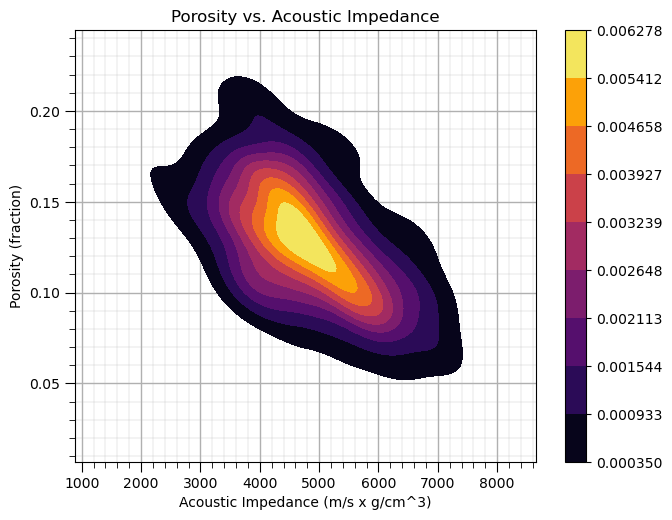

In [115]:
ax = sns.kdeplot(df,x=df['AI'].values,y=df['Porosity'].values, shade=True, n_levels = 10,cmap=cmap,cbar= True, shade_lowest = False)
#ax = sns.kdeplot(df.loc[:,['AI','Porosity']], shade=True, n_levels = 10,cmap=cmap,cbar= True, shade_lowest = False)
ax.set_xlabel('Acoustic Impedance (m/s x g/cm^3)'); ax.set_ylabel('Porosity (fraction)'); ax.set_title('Porosity vs. Acoustic Impedance')
add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2); plt.show()

I think is it useful to visualize the joint pdfs with the marginal pdfs on a single plot. We can use seaborn's 'jointplot' to accomplish this. 

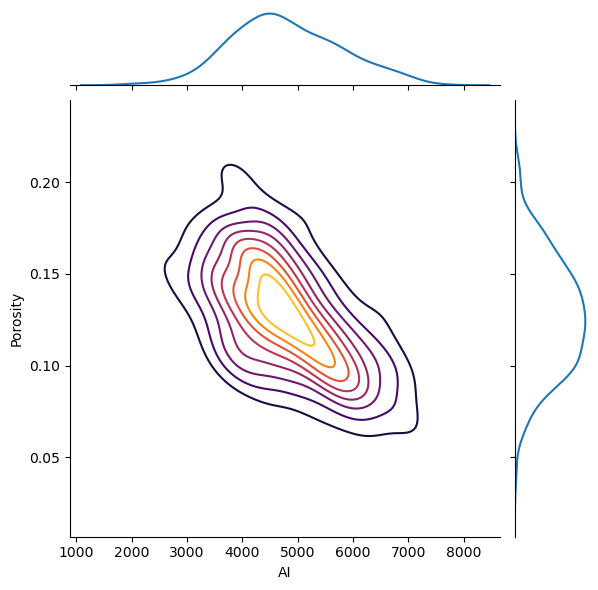

In [118]:
ax = sns.jointplot(df,x='AI',y='Porosity',kind='kde',shade = False,n_levels = 10,cmap=cmap,shade_lowest = True);

The correlation coefficient and the p-value of the correlation coefficient (significant if < $\alpha/2$ or > $1-\alpha/2$). 

#### Calculating Conditional Statistics

Of course, we could just calculate the conditional statistics by-hand. We need to select some bins over the variable that we will condition to. Let's calculate conditional statistical of porosity given acoustic impedance. We will select 9 equal spaced bins.  

In [121]:
AI_bins = np.linspace(2000,8000,10)                           # set the bin boundaries and then the centroids for plotting
AI_centroids = np.linspace((AI_bins[0]+AI_bins[1])*0.5,(AI_bins[8]+AI_bins[9])*0.5,9)
print(AI_bins)                                                # check the boundaries
print(AI_centroids)                                           # check the centroids
df['AI_bins'] = pd.cut(df['AI'], AI_bins,labels = AI_centroids) # cut on bondaries and label with centroids 
df.head()                                                     # check the new column in the DataFrame

[2000.         2666.66666667 3333.33333333 4000.         4666.66666667
 5333.33333333 6000.         6666.66666667 7333.33333333 8000.        ]
[2333.33333333 3000.         3666.66666667 4333.33333333 5000.
 5666.66666667 6333.33333333 7000.         7666.66666667]


,X,Y,Facies,Porosity,Perm,AI,AI_bins
0,100.0,900.0,0.0,0.101319,1.996868,5590.417154,5666.666667
1,100.0,800.0,1.0,0.147676,10.711789,3470.845666,3666.666667
2,100.0,700.0,1.0,0.145912,17.818143,3586.988513,3666.666667
3,100.0,600.0,1.0,0.186167,217.109365,3732.114787,3666.666667
4,100.0,500.0,1.0,0.146088,16.717367,2534.551236,2333.333333


Now we can use the 'groupby' function built-in to Pandas' DataFrames to extract subsets of porosity values in each bin from the DataFrame and then to calculate the conditional statistics: expectation, P90 and P10. Let's plot the result. 

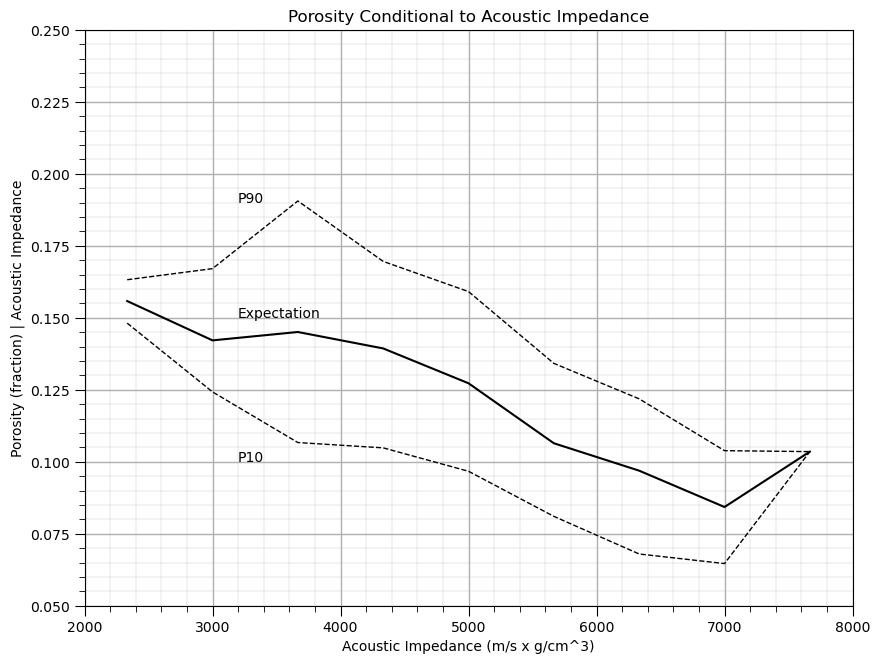

In [124]:
cond_exp = df.groupby('AI_bins')['Porosity'].mean()
cond_P90 = df.groupby('AI_bins')['Porosity'].quantile(.9)
cond_P10 = df.groupby('AI_bins')['Porosity'].quantile(.1)

plt.subplot(111)
plt.plot(AI_centroids,cond_exp,color='black')
plt.plot(AI_centroids,cond_P90,'r--',color='black',linewidth = 1.0)
plt.plot(AI_centroids,cond_P10,'r--',color='black',linewidth = 1.0)

plt.xlabel('Acoustic Impedance (m/s x g/cm^3)')
plt.ylabel('Porosity (fraction) | Acoustic Impedance')
t = plt.title('Porosity Conditional to Acoustic Impedance')
plt.ylim(pormin,pormax)
plt.xlim(AImin,AImax)
plt.text(3200, .10, 'P10')
plt.text(3200, .15, 'Expectation')
plt.text(3200, .19, 'P90')

add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2); plt.show()

Does acoustic impedance provide information about porosity? 

Yes, clearly the conditional statistics vary over acoustic impedance, knowing the acoustic impedance reduces the uncertainty about porosity.

* this provide a powerful, nonparametric model of the relationship, i.e., without any assumptions such as linearity.

#### Comments

This was a basic treatment of multivariate analysis with a focus on bivariate. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael J. Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) 